<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_8_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
#Завдання 1
#Завантажити датасет.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


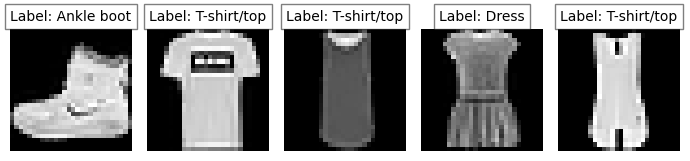

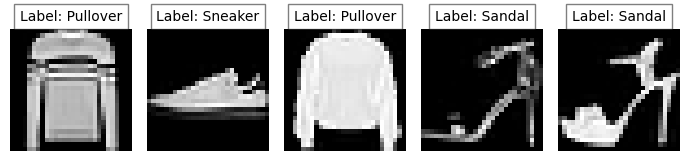

In [ ]:
#Завдання 2
#Роздруквати 10 зображень.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(7, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {class_names[train_labels[i]]}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
for i in range(5, 10):
    plt.subplot(1, 5, i - 5 + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {class_names[train_labels[i]]}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Завдання 3
#Підготувати дані, побудувати архітектуру.
train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Завдання 4
#Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7637 - loss: 0.6715 - val_accuracy: 0.8456 - val_loss: 0.4332 - learning_rate: 0.0010
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8504 - loss: 0.4103 - val_accuracy: 0.8578 - val_loss: 0.3880 - learning_rate: 0.0010
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8624 - loss: 0.3736 - val_accuracy: 0.8649 - val_loss: 0.3657 - learning_rate: 0.0010
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8733 - loss: 0.3449 - val_accuracy: 0.8696 - val_loss: 0.3577 - learning_rate: 0.0010
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8789 - loss: 0.3282 - val_accuracy: 0.8648 - val_loss: 0.3769 - learning_rate: 0.0010
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8842 - loss: 0.3136 - val_accuracy: 0.8671 - val_loss: 0.3646 - learning_rate: 0.0010
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8984 - 

In [ ]:
#Завдання 5
#Вивести архітектру моделі.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
#Завдання 6
#Зберегти модель на гугл диск.
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

Mounted at /content/drive


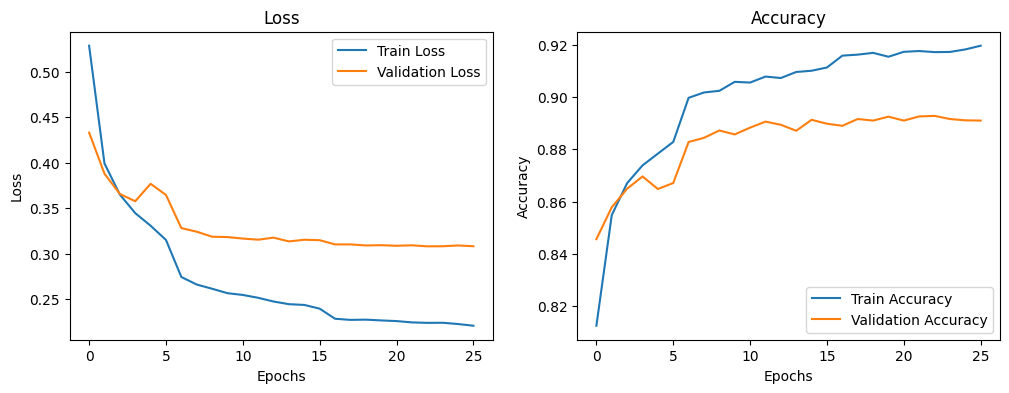

In [ ]:
#Завдання 7
#Побудувати графіки функції втрат і точності для тренувальних і тестових даних.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#Завдання 8
#Вивести класифікаційний звіт.
from sklearn.metrics import classification_report

pred_labels = model.predict(test_images)
pred_labels = pred_labels.argmax(axis=1)

print(classification_report(test_labels, pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.89      0.91      0.90      1000
           4       0.80      0.83      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.73      0.69      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



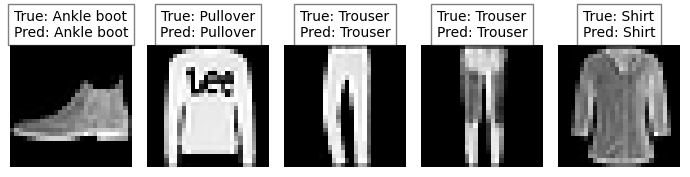

In [ ]:
#Завдання 9
#Результати розпізнавання із прогнозованим і справжнім класом.

plt.figure(figsize=(7, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[pred_labels[i]]}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Завдання 2

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def build_model(hp):
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28)))

    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='fashion_mnist_tuning'
)

tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 01m 37s]
val_accuracy: 0.8776000142097473

Best val_accuracy So Far: 0.8884999752044678
Total elapsed time: 00h 12m 13s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.summary()
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 480)                 │         376,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 288)                 │         138,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 518,218 (1.98 MB)

 Trainable params: 518,218 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8888 - loss: 0.3289
Test accuracy: 0.8884999752044678


Порівняти результати завдання 1 і 2 (точність і функцію втрат)

Перша модель:

*   Найкраща точність на валідаційних даних: 0.8926
*   Фінальні втрати на валідаційних даних: 0.3080

Друга модель:



*   Найкраща точність на валідаційних даних: 0.8885
*   Фінальні втрати на тестових даних: 0.3289







Висновки

Архітектура моделей:


*   У другій моделі більше нейронів і шарів, що збільшує кількість параметрів, але також підвищує обчислювальну складність.
*   Додавання додаткового шару та більша кількість нейронів могли сприяти кращому вивченню патернів даних, однак це незначно вплинуло на загальну точність.

Точність та втрати:


*   Перша модель показала трохи вищу точність (0.8926 проти 0.8885 у другій моделі) та менші втрати на валідаційних даних. Це може свідчити про те, що перша модель була менш схильною до перенавчання.
*   Друга модель з більшим числом параметрів та використанням Keras Tuner не показала значно кращих результатів, але працювала стабільно.

Оптимізація гіперпараметрів:


*   Використання Keras Tuner у другому завданні допомогло автоматично підібрати оптимальні гіперпараметри, що може спростити роботу з подальшим налаштуванням моделі. Проте в даному випадку різниця в результатах між моделями була незначною.

Модель з меншим числом параметрів (перша) працює не гірше, а іноді навіть краще за складнішу модель з оптимізованими гіперпараметрами. Це може свідчити про те, що для датасету fashion-mnist більш складні моделі не завжди призводять до значно кращих результатів.



